# Correlation with the target

Statistical test to evaluate if 2 continuous variables are significantly associated.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_regression

# to select features
from sklearn.feature_selection import SelectPercentile

## Regression

In [2]:
# load dataset
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [3]:
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

## Correlation

In [5]:
# univariate anova
statistics = f_regression(X_train.fillna(0), y_train)

# the function return the t and the p-values
statistics

(array([6.73682615e+00, 3.94145023e+01, 7.33363614e+01, 1.62857050e+03,
        1.38505790e+00, 3.65097556e+02, 3.62663803e+02, 3.04197009e+02,
        1.93160129e+02, 2.64166379e-01, 4.33623731e+01, 6.54341155e+02,
        6.05576313e+02, 1.28758896e+02, 4.21311432e-02, 1.13187965e+03,
        5.98878339e+01, 3.74697166e-01, 4.97954582e+02, 8.65303218e+01,
        3.89632778e+01, 1.92381821e+01, 4.31845019e+02, 2.93787921e+02,
        7.95849269e+01, 7.58024880e+02, 7.27175552e+02, 1.02368716e+02,
        1.09493897e+02, 1.42760011e+01, 3.52022335e+00, 9.59825179e+00,
        1.22112072e+00, 7.33481415e-01, 2.11044803e+00, 2.78001568e+00]),
 array([9.57991693e-003, 5.06213650e-010, 3.98274527e-017, 1.42257159e-213,
        2.39516038e-001, 8.26023733e-070, 2.03038106e-069, 8.04969151e-060,
        2.41079365e-040, 6.07383462e-001, 7.26891935e-011, 6.70757414e-112,
        2.41864868e-105, 3.45788546e-028, 8.37410946e-001, 1.53312942e-167,
        2.40752943e-014, 5.40591400e-001, 3.82

In [6]:
# If we also wanted the correlation coefficients:

corr_coeff = {
    feat: np.corrcoef(X_train[feat].fillna(0), y_train)[0,1] for feat in X_train.columns
}

corr_coeff

{'MSSubClass': -0.08100243990273742,
 'LotFrontage': 0.192883495007503,
 'LotArea': 0.258989873374454,
 'OverallQual': 0.7841470497764244,
 'OverallCond': -0.036824699713824655,
 'YearBuilt': 0.5134099502937383,
 'YearRemodAdd': 0.5121460280802402,
 'MasVnrArea': 0.47929309075764676,
 'BsmtFinSF1': 0.39902460781272725,
 'BsmtFinSF2': -0.016090978512419668,
 'BsmtUnfSF': 0.20193698916319844,
 'TotalBsmtSF': 0.6251441074616286,
 '1stFlrSF': 0.6103525431376747,
 '2ndFlrSF': 0.33479131174690474,
 'LowQualFinSF': -0.006426767172186256,
 'GrLivArea': 0.7252556765307558,
 'BsmtFullBath': 0.23549407154840182,
 'BsmtHalfBath': -0.019162861645676123,
 'FullBath': 0.5727505009831331,
 'HalfBath': 0.2796420646104131,
 'BedroomAbvGr': 0.1918170874857042,
 'KitchenAbvGr': -0.13605812088152885,
 'TotRmsAbvGrd': 0.5453858019206596,
 'Fireplaces': 0.47288369017756365,
 'GarageYrBlt': 0.2690301922174793,
 'GarageCars': 0.6529393059938265,
 'GarageArea': 0.6451361269259497,
 'WoodDeckSF': 0.3020061942384

[]

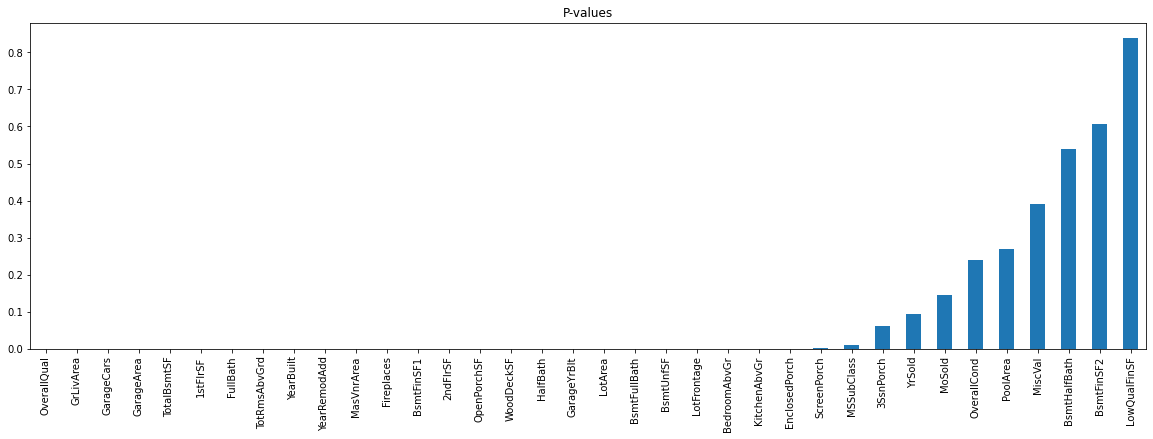

In [7]:
# plot values
pd.Series(statistics[1], index=X_train.columns).sort_values(
    ascending=True).plot.bar(figsize=(20, 6))
plt.title("P-values")
plt.plot()

[]

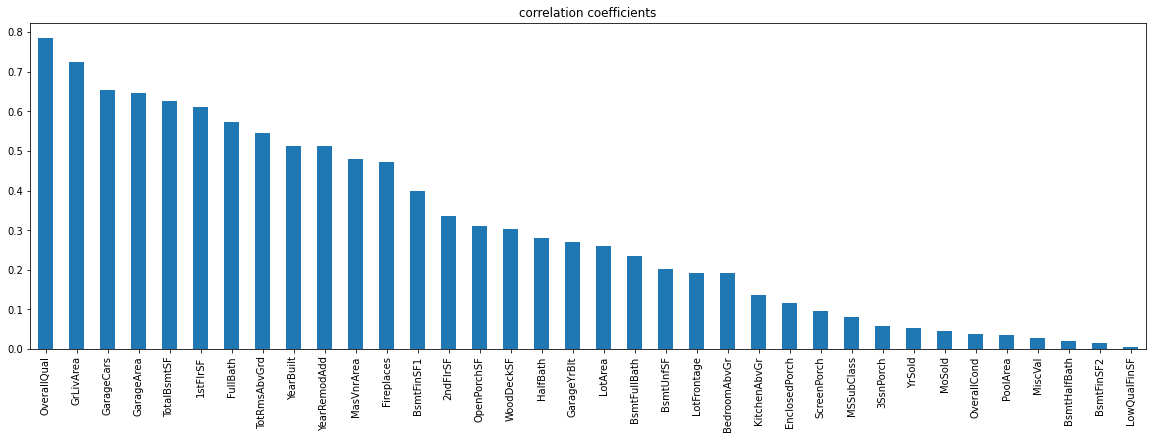

In [8]:
# plot values
pd.Series(corr_coeff).abs().sort_values(
    ascending=False).plot.bar(figsize=(20, 6))
plt.title("correlation coefficients")
plt.plot()

### Select features in top 10th percentile

In [9]:
# select features in top 10th percentile
sel_ = SelectPercentile(f_regression,
                        percentile=10).fit(X_train.fillna(0), y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [10]:
# select features / discard unwanted features

X_train = sel_.transform(X_train.fillna(0))
X_test = sel_.transform(X_test.fillna(0))

X_train.shape

(1022, 4)